# von Mises Failure Theory Plots

- The von Mises criterion states that failure occurs when the energy of distortion reaches the same energy <br> for yield/failure in uniaxial tension. 
- von Mises criterion gives a reasonable estimation of fatigue failure, especially in cases of repeated tensile <br> and tensile-shear loading.

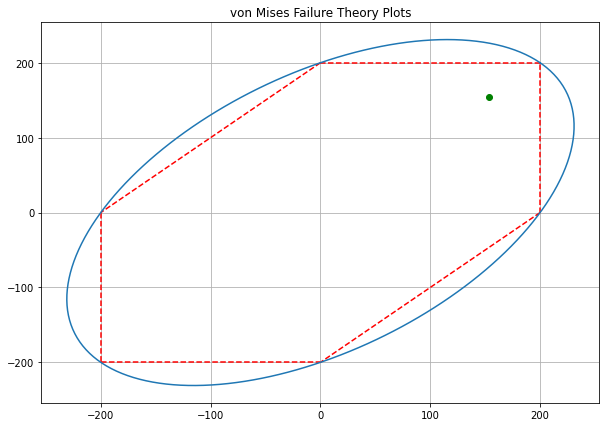

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#inputs
sy = 200 # yeild strength (降伏応力) [MPa]

s1 = 125  # principal stress 1, s1 (主応力) [MPa]
s2 = 90    # principal stress 2, s2 (主応力) [MPa]

s_von = np.sqrt(s1**2 + s2**2 -(s1-s2))

a = np.sqrt(2)*sy
b = np.sqrt(2/3)*sy

alpha = np.linspace(0,2*np.pi,360)
theta = np.pi/4 # 45degree

#--before rotation matrix--#
# x = a*np.cos(alpha)
# y = b*np.sin(alpha)

#--after rotation matrix--#
x = (a*np.cos(alpha)*np.cos(theta)) - (b*np.sin(alpha)*np.sin(theta))
y = (a*np.cos(alpha)*np.sin(theta)) + (b*np.sin(alpha)*np.cos(theta))

# set graph size
plt.figure(figsize=(10,7))
plt.title("von Mises Failure Theory Plots")

# plot dashed line for maximum shear stress criterion (Tresca yield criterion)
plt.plot([sy,sy],[0,sy],'r--')
plt.plot([0,sy],[sy,sy],'r--')
plt.plot([-sy,0],[-sy,-sy],'r--')
plt.plot([-sy,-sy],[0,-sy],'r--')
plt.plot([0,-sy],[sy,0],'r--')
plt.plot([sy,0],[0,-sy],'r--')

# check if von Mises stress in the region
plt.scatter(s_von,s_von,color = 'g')
# show gridline
plt.grid()

plt.plot(x,y)
plt.show()

### Reference :
1. [Failure Criteria](https://www.efunda.com/formulae/solid_mechanics/failure_criteria/failure_criteria_ductile.cfm#:~:text=The%20von%20Mises%20criterion%20states,stress%2C%20s3%20%3D%200.&text=Also%20shown%20on%20the%20figure,stress%20criterion%20(dashed%20line).)
2. [Strength of Materials and Failure Theories](https://web.cecs.pdx.edu/~far/me493/Strength%20of%20Materials%20and%20Failure%20Theories%202013.pdf)
3. [Rotation matrix](https://www.brainm.com/software/pubs/math/Rotation_matrix.pdf)
4. [Ellipses](https://saylordotorg.github.io/text_intermediate-algebra/s11-03-ellipses.html#:~:text=The%20equation%20of%20an%20ellipse%20written%20in%20the%20form%20(x,where%20p%2Cq%3E0.)